In [24]:
import matplotlib.pyplot as plt
import numpy as np
from refnx._lib import possibly_open_file
from refnx.dataset import Data1D
from refnx.reflect import Slab, SLD, ReflectModel, Structure
from refnx.analysis import Objective, Parameter, possibly_create_parameter, CurveFitter

In [113]:
def convert_slabs(slabs):
    arr = np.zeros_like(slabs)
    arr[:, 0] = slabs[:, 0]
    arr[:, 1] = slabs[:, 2]
    arr[:, 2] = slabs[:, 3]
    arr[:, 3] = slabs[:, 1]
    return arr[::-1]

def read_refl(f):
    with possibly_open_file(f) as g:
        l0 = g.readline()
        l1 = g.readline()

    p = l0.find(":")
    scale = float(l0[p + 1:].strip())
    p = l1.find(":")
    bkg = float(l1[p + 1:].strip())
    
    fit_n_data = np.loadtxt(f)
    fit = Data1D(data=(fit_n_data[:, 0], fit_n_data[:, 4]))
    data = Data1D(data=(fit_n_data[:, 0], fit_n_data[:, 2], fit_n_data[:, 3], fit_n_data[:, 1] * 2.3548))
    return scale, bkg, data, fit

In [124]:
df = '199431'

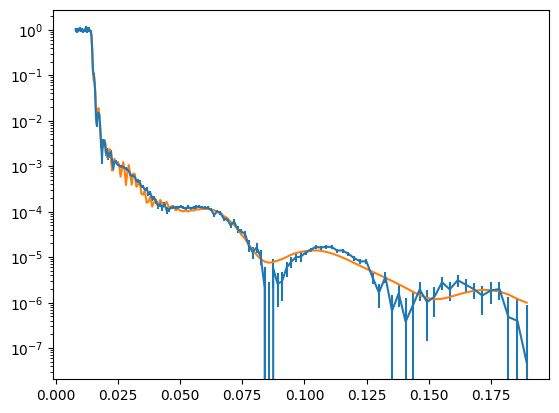

In [125]:
scale, bkg, data, fit = read_refl(f'{df}/__model-refl.dat')

fig, ax = data.plot()
ax.plot(fit.x, fit.y)
plt.yscale('log')

In [126]:
slabs = convert_slabs(np.loadtxt(f"{df}/__model-slabs.dat"))
s = Structure.from_slabs(slabs)
model = ReflectModel(s, scale=scale, bkg=bkg)
objective = Objective(model, data)

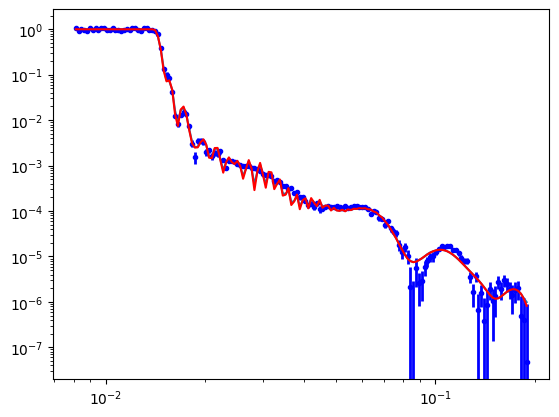

In [127]:
fig, ax = objective.plot()
# data.plot()
plt.plot(fit.x, fit.y)
plt.xscale('log')
plt.yscale('log')

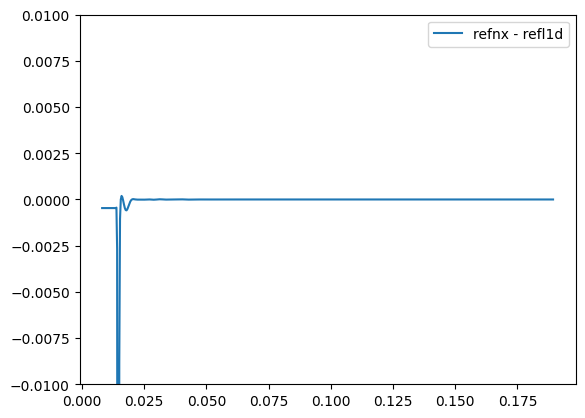

In [123]:
plt.plot(fit.x, objective.generative() - fit.y, label='refnx - refl1d')
plt.ylim(-0.01, 0.01)
plt.legend();